#  Understanding Political Violence in Ethiopia

#### Elias & Selamawit, last updated Dec 7,  2023

## Table of Contents

- ### [<font color = 'brown'> 1. Introduction </font>](#1.)
    - #### [<font color = 'seagreen'> 1.1. Project Summary </font>](#1.1.)
    - #### [<font color = 'seagreen'> 1.2. About the Data </font>](#1.2.)
- ### [<font color = 'brown'> 2. Data Preparation </font>](#2.)
    - #### [<font color = 'seagreen'> 2.1. Import Libraries </font>](#2.1.)
    - #### [<font color = 'seagreen'> 2.2. Load the Data </font>](#2.2.)
    - #### [<font color = 'seagreen'> 2.3. Clean the Data </font>](#2.3.)
- ### [<font color = 'brown'> 3. Data Analysis  </font>](#3.)
    - #### [<font color = 'seagreen'> 3.1. Fatality Rate Over the Years </font>](#3.1.)
    - #### [<font color = 'seagreen'> 3.2. What kinds of events are the frequent reasons for conflict? </font>](#3.2.)
    - #### [<font color = 'seagreen'> 3.3 Who are the major actors? </font>](#3.3.)
    - #### [<font color = 'seagreen'> 3.4. Which places are most prone to conflict? </font>](#3.4.)
    - #### [<font color = 'seagreen'> 3.5. Which media(s) has been the main source(s) of the conflict news </font>](#3.5.)
    - #### [<font color = 'seagreen'> 3.6. Is there a correlation between specific actor interactions and the level of violence in conflict events? </font>](#3.6.)
    - #### [<font color = 'seagreen'> 3.7. How do different administrative divisions (ADMIN1, ADMIN2, ADMIN3) relate to the frequency and nature of conflict events? </font>](#3.7.)
- ### [<font color = 'brown'> 4. Conclusions and Recommendations </font>](#4.)
    - #### [<font color = 'seagreen'> 4.1. Conclusions </font>](#4.1.)
    - #### [<font color = 'seagreen'> 4.2. Recommendations </font>](#4.2.)

In [1]:
from IPython.display import Image 
  
# Get the image 
Image(url="ethiopia_in_the_globe.jpg", width=400, height=400)

# <a id="1."><font color = "brown"> 1. Introduction </font> </a>

## <a id="1.1."><font color = "seagreen"> 1.1. Project Summary </font> </a>

    This project aims to provide a comprehensive analysis of political violence in Ethiopia by leveraging the ACLED dataset. The dataset contains detailed information on conflict events, including actors, event types, locations, and fatalities. Through exploratory data analysis (EDA), we will uncover insights into the dynamics of political violence, patterns of actor interactions, and geographical trends within Ethiopia. By examining this data, we seek to better understand the nature and context of political conflicts in the region.

This project will answer the following questions:
    
**1. What are the fatality rates?**

**2. What kinds of events are the frequent reasons for conflict?**

**3. Who are the major actors?**

**4. Which places are most prone to conflict?**

**5. Which media(s) has been the main source(s) of the conflict news**

**6. Is there a correlation between specific actor interactions and the level of violence in conflict events?**

**7. What is the impact of civilian targeting in conflict events, and are there any trends related to this?**

**8. How do different administrative divisions (ADMIN1, ADMIN2, ADMIN3) relate to the frequency and nature of conflict events?**

## <a id="1.2."><font color = "seagreen"> 1.2. About the Data </font></a>

The dataset includes from the date 10/08/1997 to 10/20/2023

Copyright: ACLED [Armed Conflict Location & Event Data](https://acleddata.com) is the source of these data and the data are publicly available

The ACLED dataset updates weekly.

Users must adhere to ACLED’s Terms of Use, utilizing data responsibly and in good faith. Attribution Policy requires clear acknowledgment of ACLED in any use, specifying the date of access, manipulated data details, and proper citation formats. ACLED encourages responsible academic use but monitors and addresses misuse.

The dataset contains 10660 observations of 31 variables.

→ The dataset used for this analysis was filtered only for Ethiopia.

# <a id="2."><font color = "brown"> 2. Data Preparation </font></a>

## <a id="2.1."><font color = "seagreen"> 2.1. Import Libraries </font></a>

In [2]:
# For data manipulation
import pandas as pd  

# For data visualization
import matplotlib.pyplot as plt 

 # For data computation
import numpy as np             

## <a id="2.2."><font color = "seagreen"> 2.2. Load the Data </font></a>

In [3]:
data = pd.read_excel("ethiopia_conflict_data.xlsx")
data.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ETH10805,2023-10-20,2023,2,Political violence,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,NaN,2,...,Gundo Meskel,10.250,38.733,2,Wazema Radio,New media,"Around 20 October 2023 (as reported), OLF Shan...",3,NaN,1698071505
1,ETH10816,2023-10-20,2023,2,Political violence,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,NaN,2,...,Bake Kelate,9.614,37.985,2,Addis Maleda,National,"Around 20 October 2023 (as reported), OLF Shan...",10,NaN,1698071505
2,ETH10840,2023-10-20,2023,2,Strategic developments,Strategic developments,Other,Police Forces of Ethiopia (2018-) Oromia State...,NaN,1,...,Ano,9.093,36.958,1,ESAT,International,Non-violent activity: Around 20 October 2023 (...,0,NaN,1698071505
3,ETH10799,2023-10-19,2023,1,Political violence,Violence against civilians,Abduction/forced disappearance,OLF: Oromo Liberation Front (Shane Splinter Fa...,NaN,2,...,Fiche,9.800,38.733,1,EMS,Other,"On 19 October 2023, OLF Shane abducted nine Ch...",0,NaN,1698071505
4,ETH10803,2023-10-19,2023,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (2018-),NaN,1,...,Bure,10.700,37.067,2,EMS,Other,"On 19 October 2023, ENDF and Fano clashed at W...",10,NaN,1698071505


## <a id="2.3."><font color = "seagreen"> 2.3. Clean the Data </font><a/>

### <font color = "seagreen"> 2.3.1. Formatting and Deduplication </font>

In [4]:
# Change the column names for consistent look
data = data.rename(columns=lambda x: x.lower()) 

# Check and drop duplicates if any
data = data.drop_duplicates() 

print(data.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


### <font color = "seagreen"> 2.3.2. Improving the Data Model </font>

In [5]:
# Remove columns that are not going to be used for analysis 
data = data.drop(columns=["disorder_type", "assoc_actor_1", "inter1", "assoc_actor_2", "inter2", "iso", "region", "country", "timestamp", "tags", "notes", "source_scale"])

data.head()

,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,actor2,interaction,civilian_targeting,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,fatalities
0,ETH10805,2023-10-20,2023,2,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,Fano Youth Militia,23,NaN,Oromia,North Shewa,Dera,Gundo Meskel,10.250,38.733,2,Wazema Radio,3
1,ETH10816,2023-10-20,2023,2,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,Military Forces of Ethiopia (2018-),12,NaN,Oromia,West Shewa,Abuna Ginde Beret,Bake Kelate,9.614,37.985,2,Addis Maleda,10
2,ETH10840,2023-10-20,2023,2,Strategic developments,Other,Police Forces of Ethiopia (2018-) Oromia State...,Civilians (Ethiopia),17,NaN,Oromia,East Wellega,Gobu Seyo,Ano,9.093,36.958,1,ESAT,0
3,ETH10799,2023-10-19,2023,1,Violence against civilians,Abduction/forced disappearance,OLF: Oromo Liberation Front (Shane Splinter Fa...,Civilians (China),27,Civilian targeting,Oromia,North Shewa,Fiche town,Fiche,9.800,38.733,1,EMS,0
4,ETH10803,2023-10-19,2023,1,Battles,Armed clash,Military Forces of Ethiopia (2018-),Fano Youth Militia,13,NaN,Amhara,West Gojam,Bure town,Bure,10.700,37.067,2,EMS,10


In [6]:
# Check if the we have all the columns we want

print(data.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision', 'event_type',
       'sub_event_type', 'actor1', 'actor2', 'interaction',
       'civilian_targeting', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'fatalities'],
      dtype='object')


### <font color = "seagreen"> 2.3.3. Checking for Null Values </font>

In [7]:
# Check if there are null values in all of the columns
null_values = data.isnull().sum()

print(null_values)

event_id_cnty            0
event_date               0
year                     0
time_precision           0
event_type               0
sub_event_type           0
actor1                   0
actor2                2029
interaction              0
civilian_targeting    7660
admin1                   0
admin2                   0
admin3                   0
location                 0
latitude                 0
longitude                0
geo_precision            0
source                   0
fatalities               0
dtype: int64


> There are **2029** null values in 'actor2' and **7660** in 'civilian_targeting' columns

In [8]:
# We can replace the null value of the actors with 'Unknown'
data["actor2"].fillna("Unknown", inplace = True)

# The null values in this columns are events that are not targetting civilians
data["civilian_targeting"].fillna("Not Targeting", inplace = True)

In [9]:
# let's check again
null_values = data.isnull().sum()

print(null_values)

event_id_cnty         0
event_date            0
year                  0
time_precision        0
event_type            0
sub_event_type        0
actor1                0
actor2                0
interaction           0
civilian_targeting    0
admin1                0
admin2                0
admin3                0
location              0
latitude              0
longitude             0
geo_precision         0
source                0
fatalities            0
dtype: int64


In [10]:
# Check that we are working with the data types we want
data.dtypes

event_id_cnty                 object
event_date            datetime64[ns]
year                           int64
time_precision                 int64
event_type                    object
sub_event_type                object
actor1                        object
actor2                        object
interaction                    int64
civilian_targeting            object
admin1                        object
admin2                        object
admin3                        object
location                      object
latitude                     float64
longitude                    float64
geo_precision                  int64
source                        object
fatalities                     int64
dtype: object

In [11]:
# Save the cleaned dataframe to an excel file
data.to_excel("ethiopia_conflict_data_cleaned.xlsx")

> **We have cleaned the data and saved it as a new file. Now we can proceed to the analysis.**

# <a id="3."><font color = "brown"> 3. Data Analysis </font></a>

In [12]:
# Load the clean data
data = pd.read_excel("ethiopia_conflict_data_cleaned.xlsx")

## <a id="3.1."><font color = "seagreen"> 3.1. Fatality Rate Over the Years  </font></a>

In [13]:
# Create a pivot table
summary_by_year = data.groupby('year').agg(
    total_fatalities=('fatalities', 'sum'),
    total_events=('year', 'count')
)
summary_by_year['fatality_rate'] = summary_by_year['total_fatalities'] / summary_by_year['total_events']

# Reset the index to make 'year' a regular column
summary_by_year.reset_index(inplace=True)

# Convert the 'year' column to integers
summary_by_year['year'] = summary_by_year['year'].astype(int)

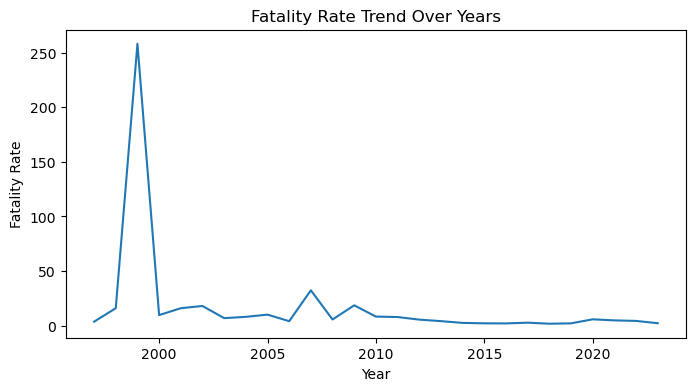

In [14]:
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(summary_by_year['year'], summary_by_year['fatality_rate'], label='Fatality Rate')

# Set the title and labels
plt.title('Fatality Rate Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Fatality Rate')

# You can make the grid visible by making this 'True'
plt.grid(False)

# Show the plot
plt.show()

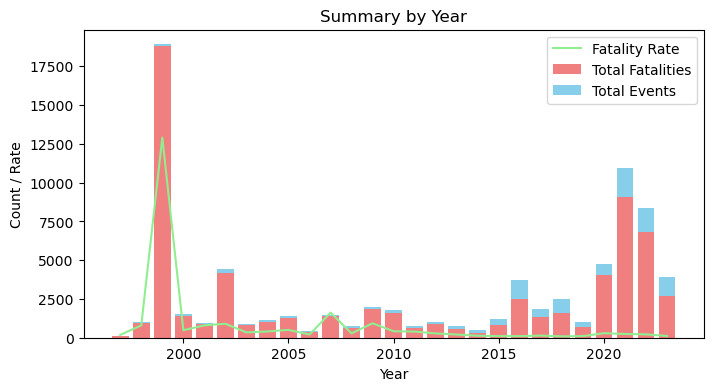

In [15]:
# Create the plot
plt.figure(figsize=(8, 4))

# Bar plot for total fatalities
plt.bar(summary_by_year['year'], summary_by_year['total_fatalities'], color='lightcoral', label='Total Fatalities')

# Bar plot for total events
plt.bar(summary_by_year['year'], summary_by_year['total_events'], color='skyblue', label='Total Events', bottom=summary_by_year['total_fatalities'])

# Line plot for fatality rate
plt.plot(summary_by_year['year'], summary_by_year['fatality_rate'] * 50, color='lightgreen', label='Fatality Rate')  # Multiply by 50 for better scale

# Set the title and labels
plt.title('Summary by Year')
plt.xlabel('Year')
plt.ylabel('Count / Rate')

# Set the legend
plt.legend(title='', loc='upper right')

# You can make the grid visible by making this 'True'
plt.grid(False)

# Show the plot
plt.show()

### <font color = "seagreen"> 3.1.1. Top Fatalities and Events by Year  </font>

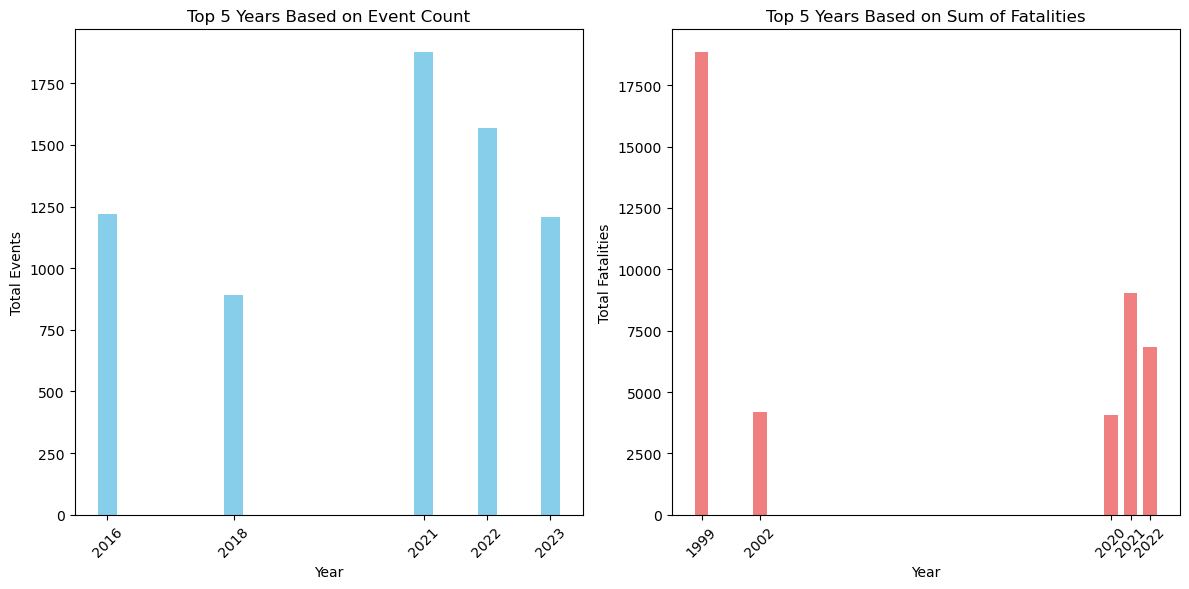

In [18]:
# Sort the data by total_events and total_fatalities in descending order and select the top 5 for each
top_events = summary_by_year.sort_values(by=['total_events'], ascending=False).head(5)
top_fatalities = summary_by_year.sort_values(by=['total_fatalities'], ascending=False).head(5)

# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for top 5 years based on event count
axs[0].bar(top_events['year'], top_events['total_events'], color= 'skyblue', width = 0.3)
axs[0].set_title('Top 5 Years Based on Event Count')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Events')
axs[0].set_xticks(top_events['year'])  # Explicitly set x-axis ticks
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

# Bar plot for top 5 years based on sum of fatalities
axs[1].bar(top_fatalities['year'], top_fatalities['total_fatalities'], color= 'lightcoral', width = 0.7)
axs[1].set_title('Top 5 Years Based on Sum of Fatalities')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total Fatalities')
axs[1].set_xticks(top_fatalities['year'])  # Explicitly set x-axis ticks
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Key Observation**

1. Total Fatalities and Events:
> Total number of fatalities varies significantly across the years, with notable peaks in 1999, the reason there is an outlier     during **1999** due to the **Eritrean–Ethiopian War.**
> Years like 2021, 2022 also stand out with **both** exceptionally high fatality rate and number of events. 
2. Top 5 Years by Total Events:
> The year 2021 records the highest number of total events, closely trailed by 2022, 2016, 2023, and 2018.
3. Top 5 Years by Total Fatalities:
> Notably, 1999 stands out as the year with the highest total fatalities, succeeded by 2021, 2022, 2002, and 2020.

## <a id="3.2."><font color = "seagreen"> 3.2. What Kinds of Events are the Frequent Reasons for Conflict?  </font></a>

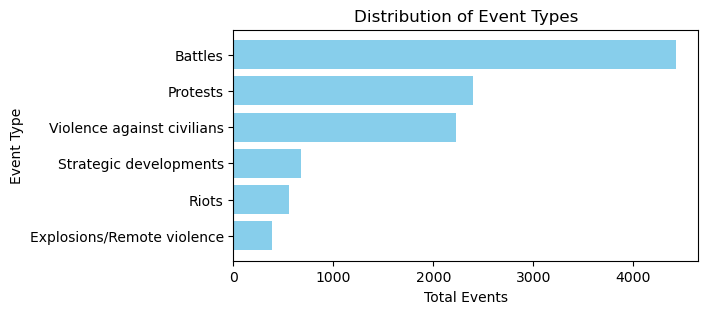

In [19]:
# Create a pivot table of top events
event_count = data.groupby('event_type').size().reset_index(name='total_event')
event_count = event_count.sort_values('total_event', ascending=False)

# Create the plot
plt.figure(figsize=(6, 3))
plt.barh(y=event_count['event_type'][::-1], width=event_count['total_event'][::-1], color='skyblue')
plt.title('Distribution of Event Types')
plt.xlabel('Total Events')
plt.ylabel('Event Type')
plt.grid(axis='x')

# You can make the grid visible by making this 'True'
plt.grid(False)

plt.show()

> The bar chart highlights that **'Battles'** emerge as the predominant event type in the conflict, surpassing other categories in frequency. This suggests that armed clashes and military engagements are the most prevalent forms of conflict events within the dataset.

## <a id="3.3."><font color = "seagreen"> 3.3. Who are the Major Actors? </font></a>

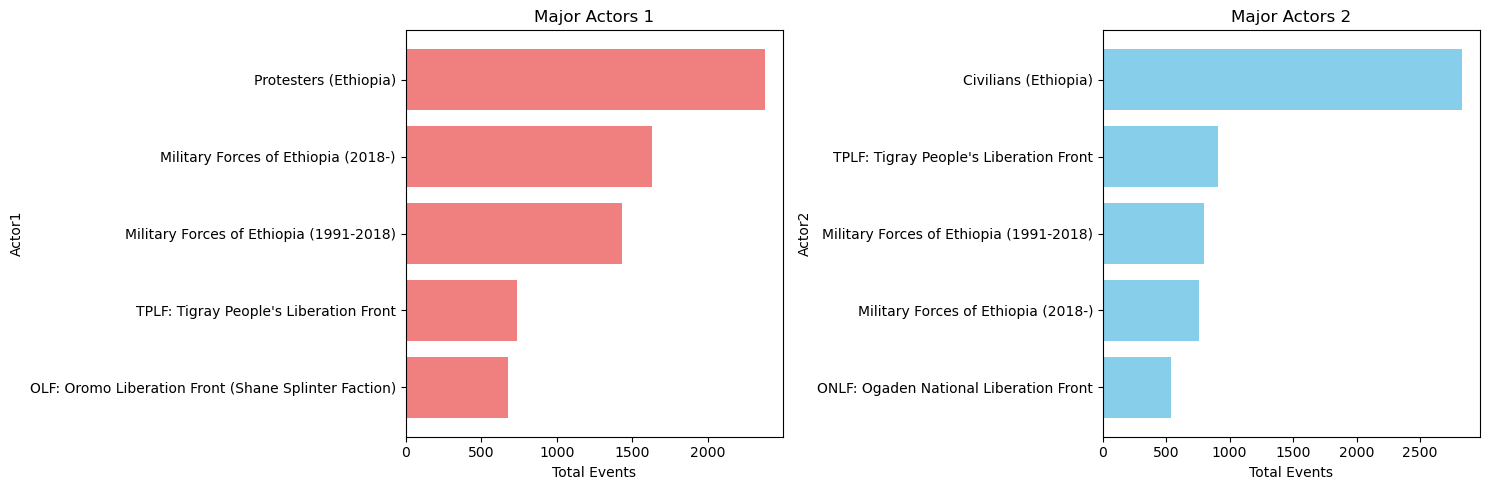

In [20]:
# Create a pivot table of top actors
actor_count1 = data.groupby('actor1').size().reset_index(name='total_events')
actor_count1 = actor_count1.sort_values('total_events', ascending=False)

# Let's remove the 'Uknown' values we have replaced the Null with
data_filtered = data[data['actor2'] != "Unknown"]
actor_count2 = data_filtered.groupby('actor2').size().reset_index(name='total_events')
actor_count2 = actor_count2.sort_values('total_events', ascending=False)

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].barh(y=actor_count1['actor1'][:5][::-1], width=actor_count1['total_events'][:5][::-1], color='lightcoral')
axs[0].set_title('Major Actors 1')
axs[0].set_xlabel('Total Events')
axs[0].set_ylabel('Actor1')
#axs[0].grid(axis='x') # Uncomment this to make the grid visible


axs[1].barh(y=actor_count2['actor2'][:5][::-1], width=actor_count2['total_events'][:5][::-1], color='skyblue')
axs[1].set_title('Major Actors 2')
axs[1].set_xlabel('Total Events')
axs[1].set_ylabel('Actor2')
#axs[1].grid(axis='x')


plt.tight_layout()
plt.show()

> As we can see from the two graphs, **'Protesters'** in Actor1 and **'Civilians'** in Actor2 are the number one actors.

## <a id="3.4."><font color = "seagreen"> 3.4. Which Places are Most Prone to Conflict? </font></a>

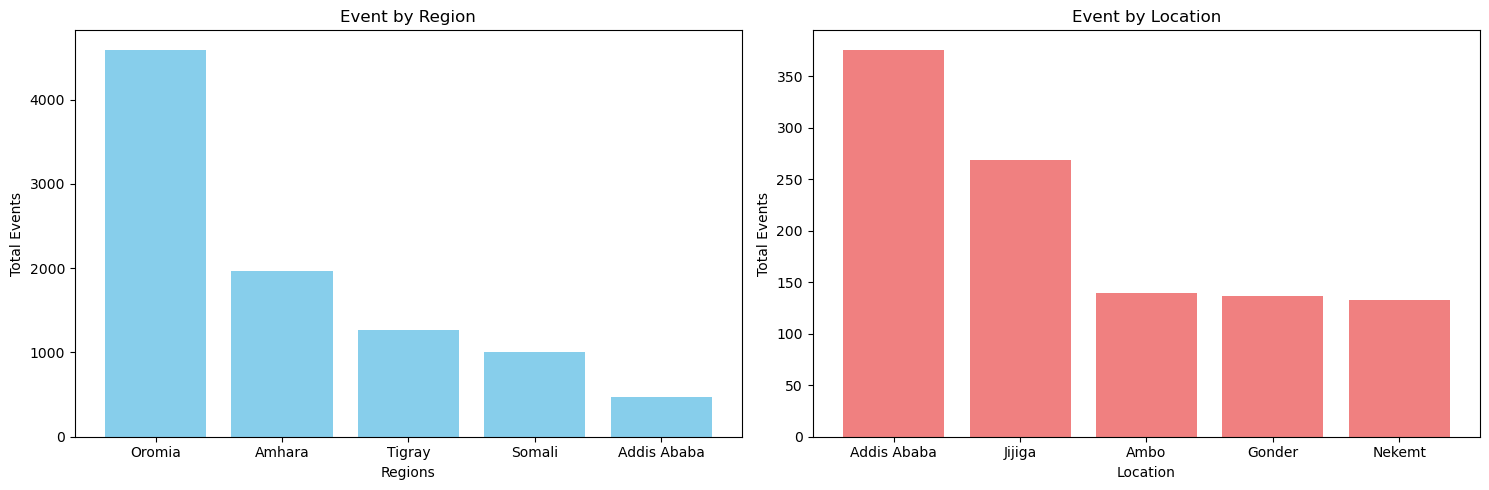

In [21]:
# Group by 'admin1' and 'location' and count events
event_by_reg = data.groupby('admin1').size().reset_index(name='total_event')
event_by_reg = event_by_reg.sort_values('total_event', ascending=False)

event_by_loc = data.groupby('location').size().reset_index(name='total_event')
event_by_loc = event_by_loc.sort_values('total_event', ascending=False)

# Creat the Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(x=event_by_reg['admin1'][:5], height=event_by_reg['total_event'][:5], color='skyblue')
axs[0].set_title('Event by Region')
axs[0].set_xlabel('Regions')
axs[0].set_ylabel('Total Events')
# axs[0].grid(axis='y')  # Uncomment this to make the grid visible

axs[1].bar(x=event_by_loc['location'][:5], height=event_by_loc['total_event'][:5], color='lightcoral')
axs[1].set_title('Event by Location')
axs[1].set_xlabel('Location')
axs[1].set_ylabel('Total Events')
# axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

From the above analysis, we can observe that:

**1. High Incidence Regions:-**

**Oromia**, with a total of **4594 events**, stands out as the region with the highest incidence of political violence.

**Amhara** and **Tigray** follow with **1970** and **1271 events**, respectively.

**2. Location-Specific Hotspots:-**

**Addis Ababa** is a specific location with a noteworthy **468 events**, indicating a concentration of political events in the capital city.

**Jijiga**, with **269 events**, is a notable hotspot outside the major regions.

These points suggest that **Oromia**, **Amhara**, and **Tigray** experience a relatively higher frequency of political events, and in a specific locations like **Addis Ababa** and **Jijiga**.

## <a id="3.5."><font color = "seagreen"> 3.5. Which Media(s) Has Been the Main Source(s) of the Conflict News </font></a>

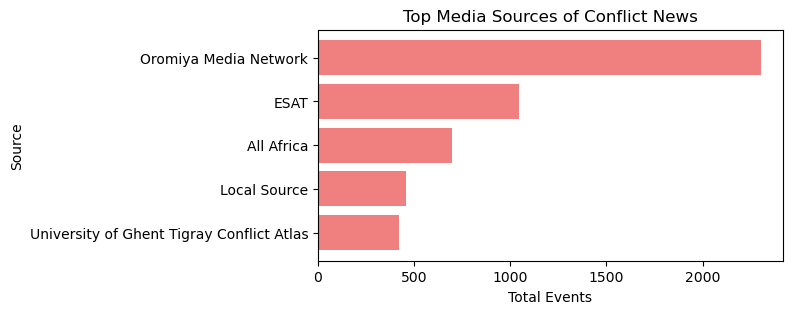

In [24]:
# Group by 'source' and count events
source_summary = data.groupby('source').size().reset_index(name='total_events')
source_summary = source_summary.sort_values('total_events', ascending=False)

# Plot
plt.figure(figsize=(6, 3))
plt.barh(y=source_summary['source'][:5][::-1], width=source_summary['total_events'][:5][::-1], color='lightcoral')
plt.title('Top Media Sources of Conflict News')
plt.xlabel('Total Events')
plt.ylabel('Source')
plt.grid(False)
plt.show()

> **Oromiya Media Network** is the number one source of conflict news, as we can observe from the above graph.

## <a id="3.6."><font color = "seagreen"> 3.6. Is There a Correlation between Specific Actor Interactions and the Level of Violence in Conflict Events? </font></a>

Correlation Coefficient: -0.03695815072494053


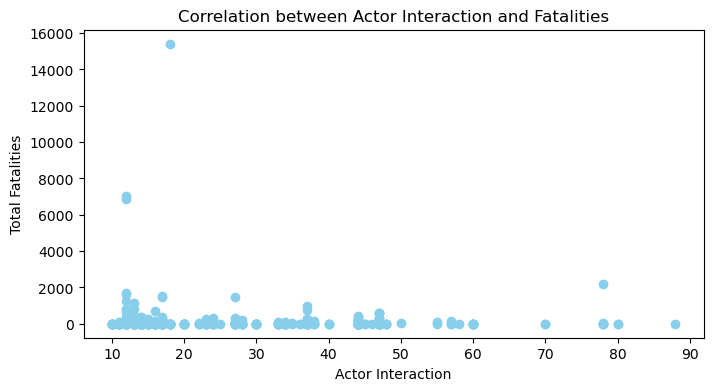

In [25]:
# Group by 'actor1', 'actor2', and 'interaction' and sum 'fatalities'
actor_intr_summary = data.groupby(['actor1', 'actor2', 'interaction'])['fatalities'].sum().reset_index(name='total_fatalities')

# Calculate correlation coefficient
correl_coeffi = actor_intr_summary['interaction'].corr(actor_intr_summary['total_fatalities'])
print(f"Correlation Coefficient: {correl_coeffi}")

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(actor_intr_summary['interaction'], actor_intr_summary['total_fatalities'], color = 'skyblue')
plt.xlabel('Actor Interaction')
plt.ylabel('Total Fatalities')
plt.title('Correlation between Actor Interaction and Fatalities')
plt.show()

**Observation:**

> A correlation coefficient of **-0.037** suggests a very weak negative correlation between the specific actor interactions and the level of violence in conflict events. However, the correlation is close to zero, so the relationship between these variables is weak, and there isn’t a clear linear association between them.

## <a id="3.7."><font color = "seagreen"> 3.7. What Is the Tmpact of Civilian Targeting in Conflict Events, and Are There Any Trends Related to This?  </font><a/>

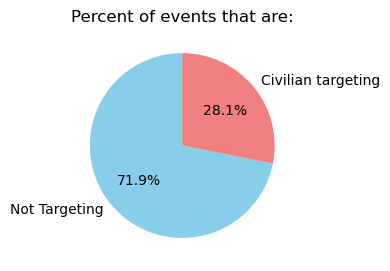

In [26]:
# Count occurrences of each unique value
value_counts = data['civilian_targeting'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percent of events that are:')
plt.show()

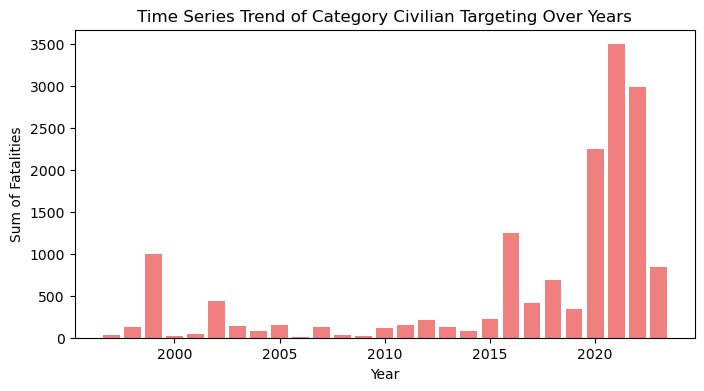

In [27]:
# Select a specific value in the 'civilian_targeting' column
filtered_data = data[data['civilian_targeting'] == 'Civilian targeting']

# Group by 'year' and sum of 'fatalities'
summary_data = filtered_data.groupby('year')['fatalities'].sum().reset_index()

# Create the plot
plt.figure(figsize=(8, 4))
plt.bar(summary_data['year'], summary_data['fatalities'], color='lightcoral')
plt.title(f'Time Series Trend of Category Civilian Targeting Over Years')
plt.xlabel('Year')
plt.ylabel('Sum of Fatalities')
#plt.grid(axis='y')
plt.show()

**Observation:**

> Although the overall percentage of events that targeted civilians is less than one-third, there is a discernible upward trend in civilian targeting incidents over recent years. The increase in such events is particularly notable, suggesting a concerning pattern of conflict dynamics wherein civilians are increasingly becoming targets.

## <a id="3.8."><font color = "seagreen"> 3.8. How Do Different Administrative Divisions (ADMIN1, ADMIN2, ADMIN3) Relate to the Frequency and Nature of Conflict Events?  </font><a/>

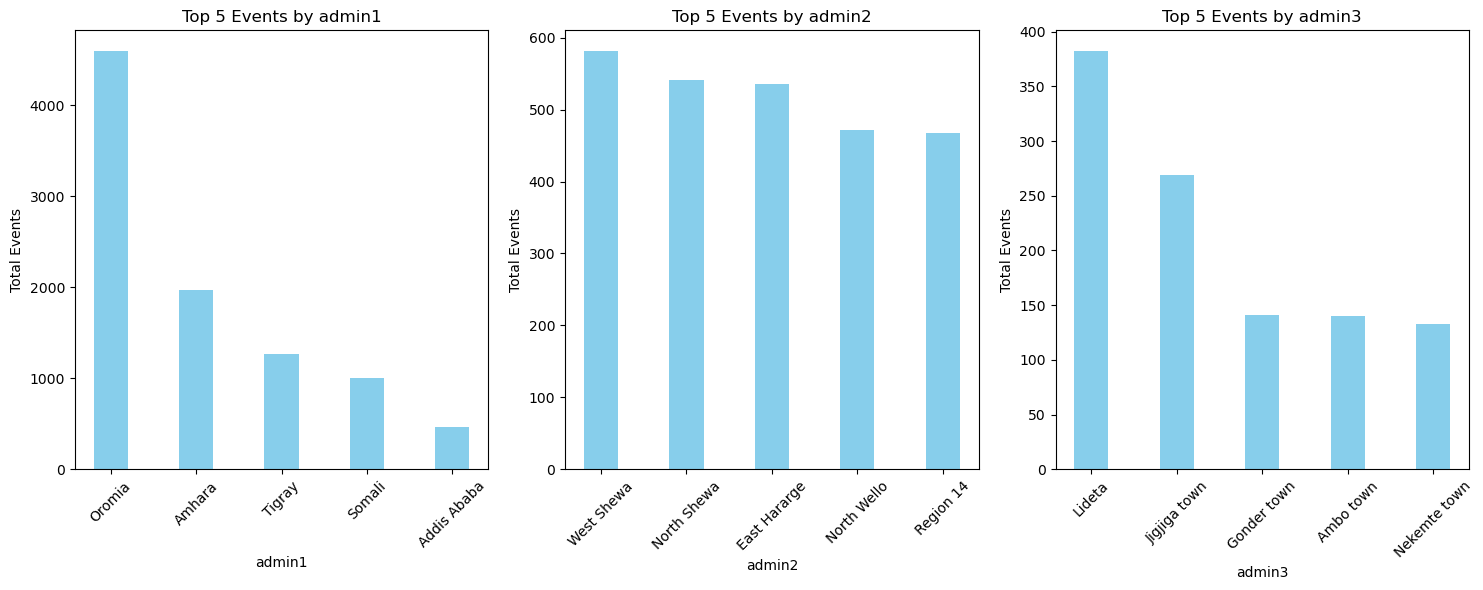

In [28]:
# Summarize by ADMIN1
events_by_admin1 = data.groupby('admin1').size().reset_index(name='total_events_admin1')

# Summarize by ADMIN2
events_by_admin2 = data.groupby('admin2').size().reset_index(name='total_events_admin2')

# Summarize by ADMIN3
events_by_admin3 = data.groupby('admin3').size().reset_index(name='total_events_admin3')

# Function to plot bar chart for an administrative level
def plot_admin_level(data, level):
    plt.bar(data[level], data[f'total_events_{level}'], color='skyblue', width=0.4)
    plt.title(f'Top 5 Events by {level}')
    plt.xlabel(level)
    plt.ylabel('Total Events')
    plt.xticks(rotation=45)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Select top 5 for each administrative level
top5_events_by_admin1 = events_by_admin1.nlargest(5, 'total_events_admin1')
top5_events_by_admin2 = events_by_admin2.nlargest(5, 'total_events_admin2')
top5_events_by_admin3 = events_by_admin3.nlargest(5, 'total_events_admin3')

# Plot each administrative level side by side
plt.subplot(1, 3, 1)
plot_admin_level(top5_events_by_admin1, 'admin1')

plt.subplot(1, 3, 2)
plot_admin_level(top5_events_by_admin2, 'admin2')

plt.subplot(1, 3, 3)
plot_admin_level(top5_events_by_admin3, 'admin3')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

**Administrative Divisions and Conflict Events:**

> Significant variation in conflict events is observed across administrative divisions.

> Certain regions, such as Oromia and Amhara, consistently stand out with high conflict frequency.

> The capital city Addis Ababa and other towns like Lideta and Jigjiga show concentrated political events.

> West Shewa, East Hararge, and North Shewa emerge as hotspots at the ADMIN2 level, emphasizing regional disparities.

> Specific towns like Gonder, Ambo, and Nekemte play noteworthy roles at the ADMIN3 level.

These patterns suggest that understanding conflict dynamics requires considering both administrative and geographical contexts.

# <a id="4."><font color = "brown"> 4. Conclusions and Recommendations </font><a/>

## <a id="4.1."><font color = "seagreen"> 4.1. Conclusions </font><a/>

**Regional Disparities:**

> Conflict events in Ethiopia are not uniform and exhibit regional disparities. Regions like Oromia and Amhara consistently experience higher frequencies of conflict.

**Urban Concentration:**

> Urban centers, including the capital city Addis Ababa, and specific towns like Lideta and Jigjiga, are focal points for political events.

**Temporal Trends:**

> Examining trends over time reveals fluctuations, suggesting a dynamic socio-political landscape.

## <a id="4.2."><font color = "seagreen"> 4.2. Recommendations </font><a/>

**Enhanced Monitoring:**

> Implement a robust monitoring system, especially in high-conflict regions, to promptly identify and respond to emerging issues.

**Community Engagement:**

> Foster community engagement and dialogue to address underlying issues contributing to conflict, emphasizing local context.

**Urban Security Measures:**

> Implement targeted security measures in urban centers to mitigate the impact of conflict events, especially in capital regions.

**Data-Driven Policies:**

> Utilize data analytics for evidence-based policy formulation, adapting strategies based on changing conflict dynamics.

**Collaborative Initiatives:**

> Collaborate with local and international stakeholders to address conflict at various administrative levels and promote peace-building efforts.

> #  <font color = "green"> Harmony in Diversity! </font>

> #  <font color = "gold"> Progress in Unity! </font>

> #  <font color = "red"> Nurturing Peace for a Flourishing Ethiopia! </font>